In [92]:
## Load dataset 

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
breast_cancer_data = datasets.load_breast_cancer()
df = breast_cancer_data.data

labels = breast_cancer_data.target

In [93]:
# Reshaping labels to append to dataframe 

labels = np.reshape(labels,(569,1))

In [94]:
breast_cancer_df = np.concatenate([df, labels], axis=1)

In [95]:
# converting to dataframe 

breast_cancer_df = pd.DataFrame(breast_cancer_df)

In [96]:
features = breast_cancer_data.feature_names

In [97]:
# Adding label column name

features_labels = np.append(features, "label")

#Adding the labels to the dataframe columns 
breast_cancer_df.columns = features_labels

In [99]:
#Separate features and target variables
X = breast_cancer_df.loc[:, features].values
y = breast_cancer_df.loc[:, 'label'].values

#Normalising data using StandardScaler
from sklearn.preprocessing import StandardScaler
#x = breast_cancer_df.loc[:, features].values
#x = StandardScaler().fit_transform(x)

In [100]:
#3 Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
random_state = 0)

In [101]:
#4 performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [102]:
#5 Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


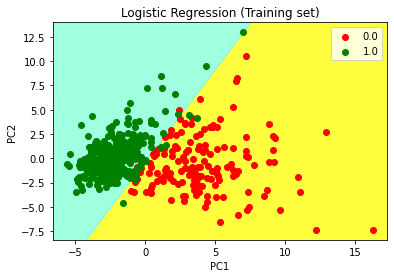

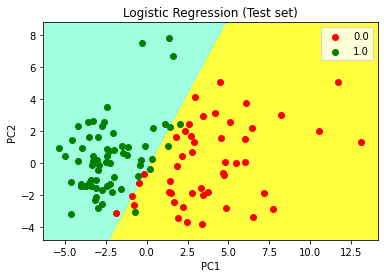

In [103]:
#6 Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#7 Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

#8 making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#9 Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
# show scatter plot
plt.show()


#10 Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()